In [38]:
from fastai.conv_learner import *
import re

In [2]:
arch = resnext101_64
sz = 256
path = './data/'
bs = 64

In [3]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
data = ImageClassifierData.from_paths(path, test_name='test', tfms=tfms)

In [4]:
learn = ConvLearner.pretrained(arch, data, ps=0.5, precompute=True)

### Learning with precompute

In [5]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 92%|█████████▏| 59/64 [00:01<00:00, 38.97it/s, loss=10.7]


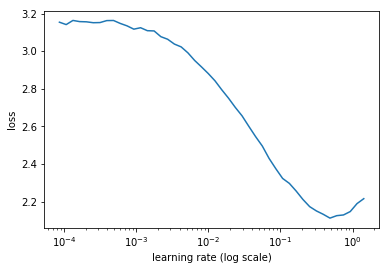

In [6]:
learn.sched.plot()

In [7]:
learn.fit(0.1, 2, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.447576   0.562295   0.811198  
    1      0.903443   0.41706    0.872396                  
    2      0.611103   0.354461   0.891927                  
    3      0.646081   0.447672   0.858073                  
    4      0.513623   0.303218   0.898438                  
    5      0.409174   0.298638   0.90625                   



[0.29863796, 0.90625]

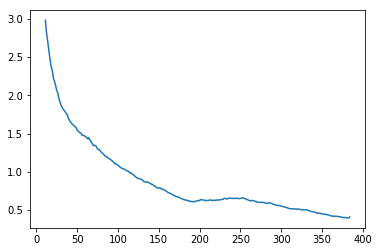

In [8]:
learn.sched.plot_loss()

### Learn with data augmentation

In [9]:
learn.precompute = False

In [10]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 94%|█████████▍| 60/64 [01:05<00:04,  1.09s/it, loss=3.02] 

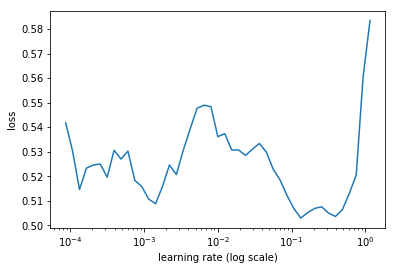

In [11]:
learn.sched.plot()

In [12]:
learn.fit(0.01, 2, cycle_len=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))


  0%|          | 0/64 [00:00<?, ?it/s]                    

Exception in thread Thread-13:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                  
    0      0.504095   0.261766   0.91276   
    1      0.491338   0.248757   0.923177                  
    2      0.48745    0.251907   0.919271                  
    3      0.49334    0.262737   0.890625                  
    4      0.471625   0.252724   0.895833                  
    5      0.457391   0.249889   0.919271                  



[0.24988852, 0.9192708333333334]

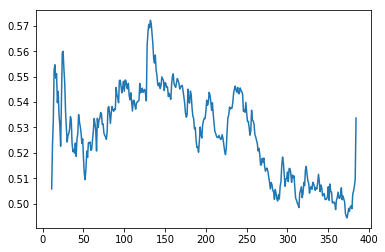

In [13]:
learn.sched.plot_loss()

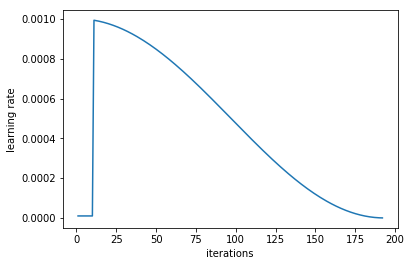

In [31]:
learn.sched.plot_lr()

## Learn with unfreezing the layers

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()
learn.sched.plot()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/64 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1512387374934/work/torch/lib/THC/generic/THCStorage.cu:58

In [80]:
learn.fit([1e-4, 1e-3, 1e-2], 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.436223   0.243165   0.920573  
    1      0.433296   0.246881   0.897135                  
    2      0.411596   0.228802   0.934896                  



[0.22880185, 0.9348958333333334]

In [84]:
submit(learn)

 25%|██▌       | 1/4 [00:13<00:39, 13.29s/it]

KeyboardInterrupt: 

## Make Submission

In [81]:
def submit(learn):
    log_probs = learn.TTA(is_test=True)
    probs = np.exp(log_probs[0])
    probs = np.mean(probs, axis=0)
    preds = np.argmax(probs, axis=1)
    pred_classes = list(map(lambda x: learn.data.classes[x], preds))
    fnames = list(map(lambda x: re.split('/', x)[1], learn.data.test_ds.fnames))
    
    df = pd.DataFrame({'file': fnames, 'species': pred_classes})
    df.to_csv(f'{path}results/results.csv', index=False)
    !kg submit {path}results/results.csv

In [85]:
FileLink(f'{path}results/results.csv')

/home/paperspace/kaggle/plant-seedlings-classification/data/results/results.csv